In [1]:
import random
import time
import matplotlib.pyplot as plt
import numpy as np

In [2]:
class Point:
    x: float
    y: float

    def __init__(self, point: (float, float)):
        self.x, self.y = point


class LinearBounds:
    lower: float
    higher: float

    def __init__(self, lower: float, higher: float):
        self.lower = lower
        self.higher = higher

    def length(self) -> float:
        return self.higher - self.lower

    def get_random_value(self) -> float:
        return random.uniform(self.lower, self.higher)


class Bounds:
    x: LinearBounds
    y: LinearBounds

    def __init__(self, x: LinearBounds, y: LinearBounds):
        self.x = x
        self.y = y

    def area(self) -> float:
        return self.x.length() * self.y.length()

    def get_random_point(self) -> Point:
        return Point((self.x.get_random_value(), self.y.get_random_value()))

## Heart function

$\left(x^{2}+y^{2}-1\right)^{3}=x^{2}y^{3}$

In [3]:
def getIsInside(p: Point) -> bool:
    if (p.x**2 + p.y**2 - 1)**3 <= p.x**2 * p.y**3:
        return True
    return False

In [4]:
bounds = Bounds(LinearBounds(-1.25, 1.25), LinearBounds(-1.25, 1.25))

The approximated Integral of the function is: 3.64688
And the whole thing took 0.58856 Seconds for 2000 samples


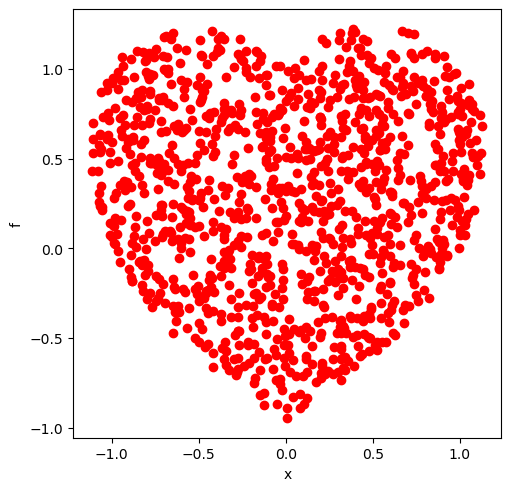

In [5]:
fig, axs = plt.subplot_mosaic([['linear-linear']], layout='constrained')
ax = axs['linear-linear']
ax.set_xscale('linear')
ax.set_yscale('linear')
ax.set_xlabel('x')
ax.set_ylabel('f')
ax.set_box_aspect(1)

startTime = time.time()
pointsInside: int = 0
samples: int = 2 * 10**3

for i in range(samples):
    toTestPoint = bounds.get_random_point()
    if getIsInside(toTestPoint):
        pointsInside += 1
        ax.plot(toTestPoint.x, toTestPoint.y, "ro")

integral = (pointsInside / samples) * bounds.area()
print(f"The approximated Integral of the function is: {integral:.5f}")

print(f"And the whole thing took {time.time()-startTime:.5f} Seconds for {samples} samples")